Оптимизатор — это метод достижения лучших результатов, помощь в ускорении обучения.

Это алгоритм, используемый для незначительного изменения параметров, таких как веса и скорость обучения, чтобы модель работала правильно и быстро.

Рассмотрим такие оптимизаторы, как:

- SGD (стохастический градиентный спуск)
- Adagrad (среднеквадратичное распространение корня)
- RMSprop (экспоненциально затухающее среднее)
- Adam

# **Импульсный оптимизатор**

**Стохастический градиентный спуск - Stochasticу Gradient descent (SGD)**

Берем случайные объекты, подаем их в модель и получаем предсказание, считаем функцию потерь, обновляем веса, повторяем снова до тех пор пока функция ошибки не окажется в точке минимума. Есть три варианта подачи объектов: по одному, весь набор, данных партиями (батчами, степенью числа 2 (32,64,128), это наиболее распространенная реализация).

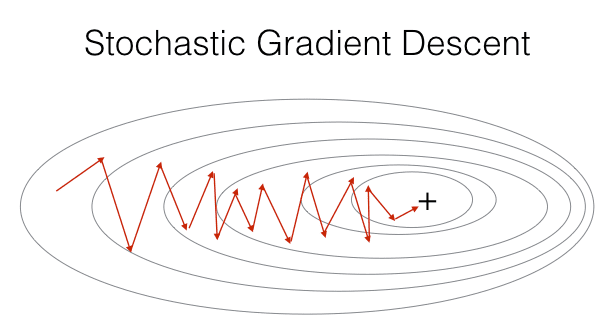

Основная проблема - попадание функции в локальные минимумы вместо нахождения глобального. Для ее решения используются модификации стахастического градиента, использующие скользящее среднее градиентов:

- оптимизатор **Momentum**, учитывает прошлые градиенты для сглаживания обновления
- Оптимизатор **Nesterov Momentum**, его особенностью является вычисление градиента при обновлении

Пример использования оптимизатора **SGD**:

In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(64, input_shape=(10,), activation='softmax'))
sgd = optimizers.SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

Документация:

- SGD в Керас https://keras.io/api/optimizers/sgd/

Документация по оптимизаторам на русском:

- https://ru-keras.com/optimizer/

# **Адаптивные оптимизаторы**

Цель адаптивных алгоритмов - отдельный learning rate для каждого из параметров. Чем чаще и сильнее меняется параметр, тем меньше его следующие изменения.

## **Среднеквадратичное распространение корня Adagrad**

Например, какой-то из нейронов в каждой итерации немного изменяет свои значения(0,0.1,0,0.1,0.2) и есть другой, который колеблется от 0 до 10, к примеру. Эти скачки нужно сгладить. Для этого мы по каждому нейрону храним его историю, это дает нам возможность рассчитать размер следующий шаг как корень из произведения квадратов его двух предыдущих шагов.

Таким образом, чем больше были предыдущие шаги изменений для нейрона, тем меньше буду следующие, это помогает "успокоить" особо активные нейроны.

Но существует вероятность застрять в локальном минимуме, потому что скорость постоянно падает.

Пример использования оптимизатора **Adagrad**:

In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(64, input_shape=(10,), activation='softmax'))
adagrad = optimizers.Adagrad(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=adagrad)

Документация:

- Adagrad в Keras https://keras.io/api/optimizers/adagrad/

Документация по оптимизаторам на русском:

- https://ru-keras.com/optimizer/

## **Экспоненциально затухающее среднее значение (RMSprop, root mean square)**

Существенным свойством RMSprop является то, что вы не ограничены только суммой прошлых градиентов, но вы более ограничены градиентами последних временных шагов. RMSprop вносит свой вклад в экспоненциально затухающее среднее значение прошлых «квадратичных градиентов». В RMSProp мы пытаемся уменьшить вертикальное движение, используя среднее значение.

Появляется новая зависимость размера шага от предыдущих. Уходит обязательность того, если 10 шагов назад был большой шаг, то сейчас должен быть меньший, и это позволяет выбраться из ямы. То есть он немного буксует в локальном минимуме, а потом снова начинает увеличиваться при необходимости, потому что зависимость от предыдущих шагов экспоненциальная.

Чаще всего используется в генеративных алгоритмах.

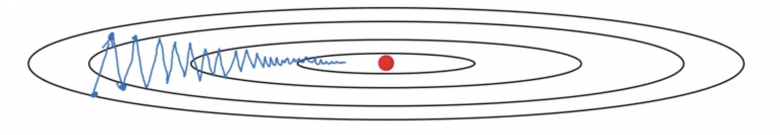

Пример использования оптимизатора **RMSprop**:

In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(64, input_shape=(10,), activation='softmax'))
rmsprop = optimizers.RMSprop(learning_rate=0.001, rho=0.9)
model.compile(loss='mean_squared_error', optimizer=rmsprop)

Документация:

- RMSprop в Keras https://keras.io/api/optimizers/rmsprop/

Документация по оптимизаторам на русском:

- https://ru-keras.com/optimizer/

# **Оптимизатор Adam**

Adam — один из самых эффективных алгоритмов оптимизации в обучении нейронных сетей. Он сочетает в себе идеи RMSProp и оптимизатора импульса (momentum).

Чем больше движемся в одну сторону, тем больше шаг и адаптация каждого параметра.

Вместо того чтобы адаптировать скорость обучения параметров на основе среднего первого момента (среднего значения), как в RMSProp, Adam также использует среднее значение вторых моментов градиентов. В частности, алгоритм вычисляет экспоненциальное скользящее среднее градиента и квадратичный градиент

Пример использования оптимизатора **Adam**:

In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(64, input_shape=(10,), activation='softmax'))
adam = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='mean_squared_error', optimizer=adam)

Документация:
- Adam в Keras https://keras.io/api/optimizers/adam/

Документация по оптимизаторам на русском:

- https://ru-keras.com/optimizer/

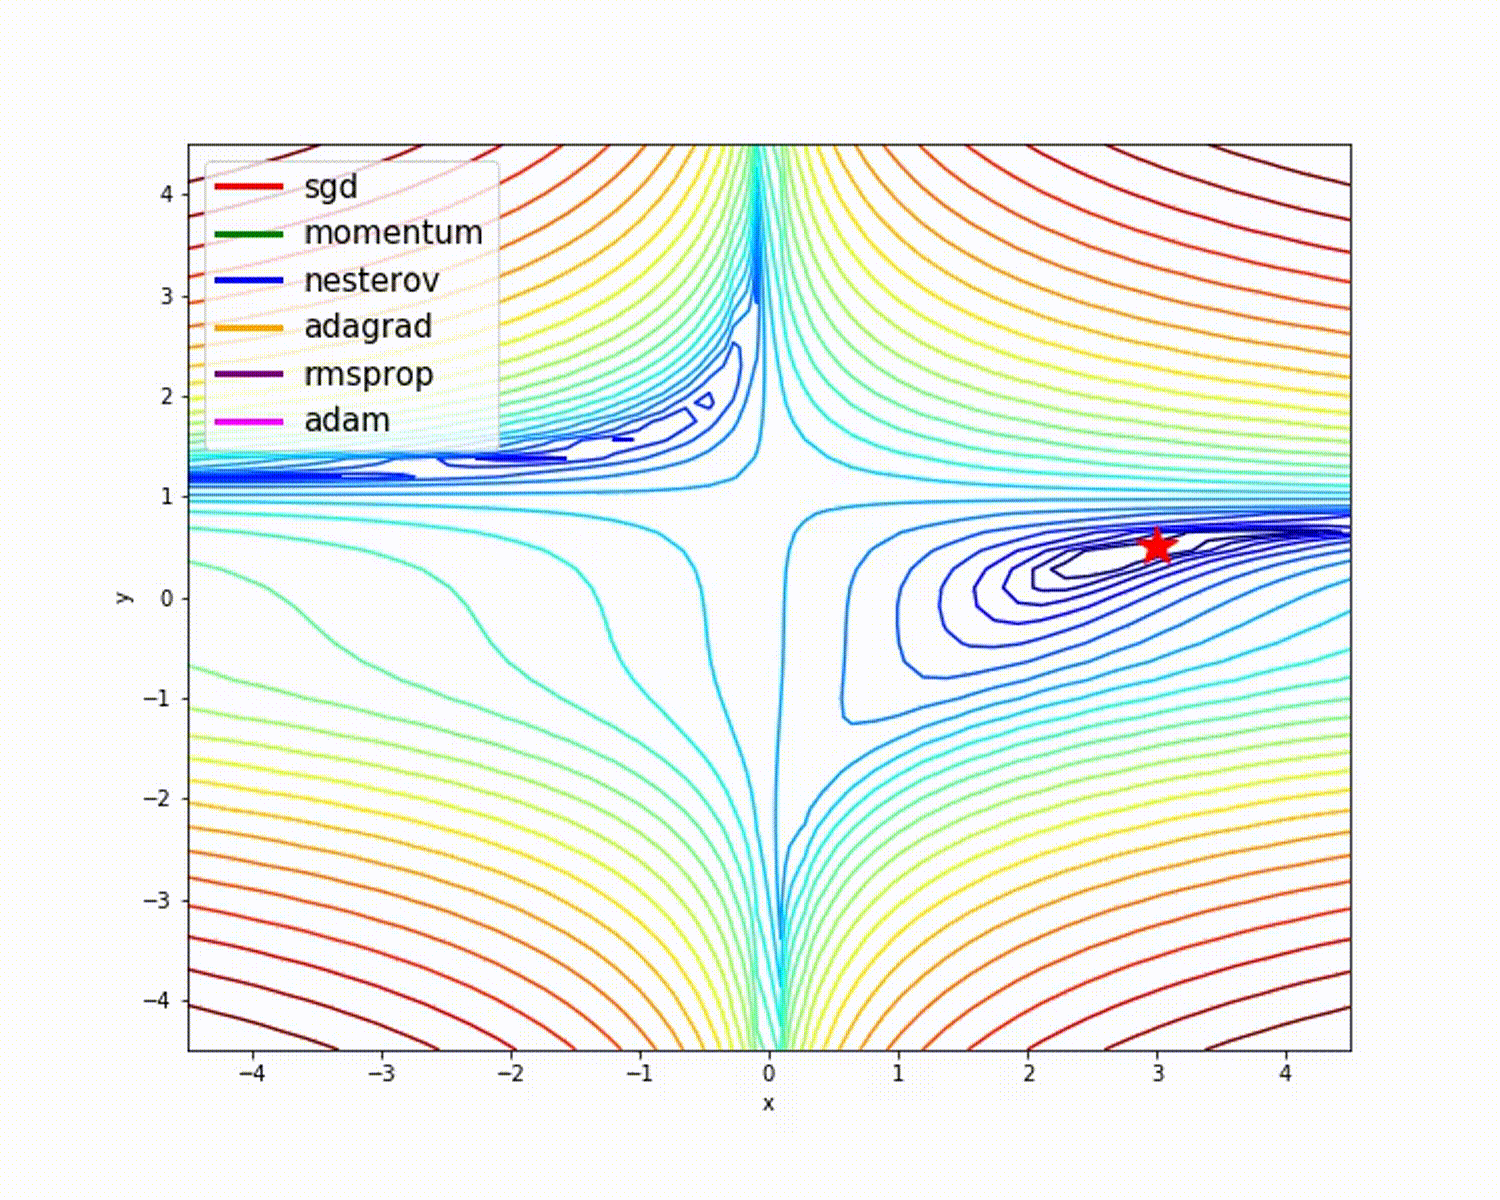